Initializing sim with 17633800 people for 140 days
  Running 2020-02-10 ( 0/140) (330.14 s)  ———————————————————— 1%
  Running 2020-02-20 (10/140) (391.57 s)  •——————————————————— 8%
  Running 2020-03-01 (20/140) (460.63 s)  ••—————————————————— 15%
  Running 2020-03-11 (30/140) (524.82 s)  ••••———————————————— 22%
  Running 2020-03-21 (40/140) (593.93 s)  •••••——————————————— 29%
  Running 2020-03-31 (50/140) (680.38 s)  •••••••————————————— 36%
  Running 2020-04-10 (60/140) (732.14 s)  ••••••••———————————— 43%
  Running 2020-04-20 (70/140) (796.51 s)  ••••••••••—————————— 50%
  Running 2020-04-30 (80/140) (854.34 s)  •••••••••••————————— 57%
  Running 2020-05-10 (90/140) (976.18 s)  ••••••••••••———————— 65%
  Running 2020-05-20 (100/140) (1094.86 s)  ••••••••••••••—————— 72%
  Running 2020-05-30 (110/140) (1319.18 s)  •••••••••••••••————— 79%
  Running 2020-06-09 (120/140) (1428.00 s)  •••••••••••••••••——— 86%
  Running 2020-06-19 (130/140) (1541.90 s)  ••••••••••••••••••—— 93%
  Run

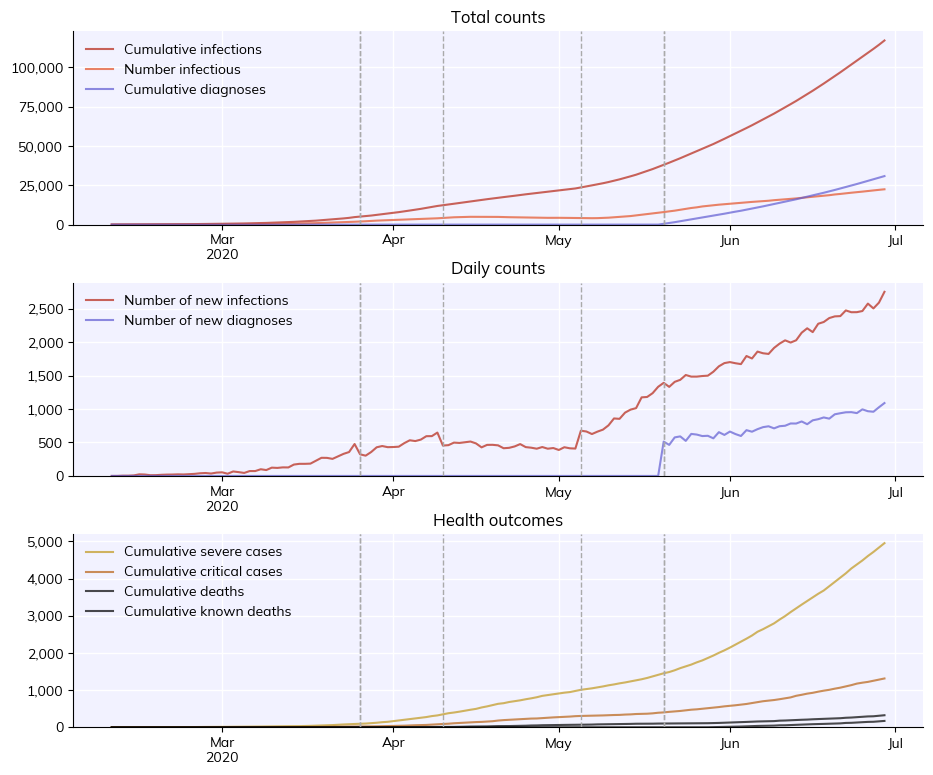

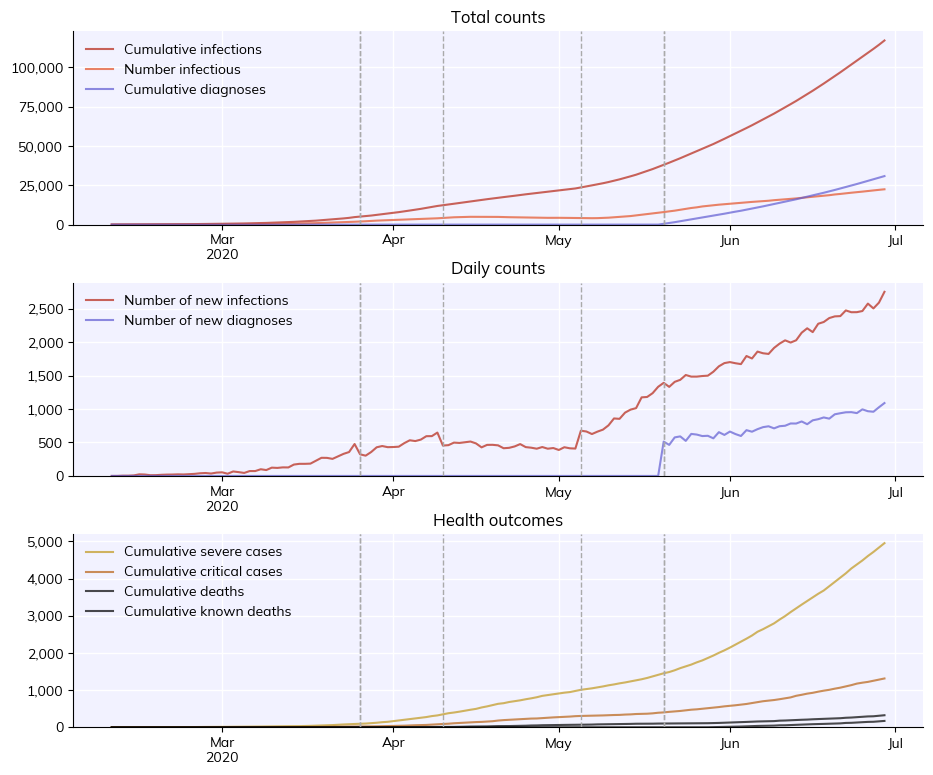

In [2]:
import covasim as cv

# 定义模拟参数
pars = dict(
    pop_size = 17633800,    # 深圳人口规模设置为1763.38万
    pop_infected = 75,      # 初始75人感染
    beta = 0.012,           # 传播率校准值
    pop_type = 'hybrid',    # 使用家庭、学校、工作场所的混合接触模式
    start_day = '2020-02-10',  # 模拟开始日期
    end_day = '2020-06-29'     # 模拟结束日期
)

# 定义干预措施
# 各场所接触者追踪概率（家庭/学校/工作/社区）
tr_probs = dict(h=0.9, s=0.7, w=0.7, c=0.3)
# 各场所接触者追踪所需时间（天）
trace_time = dict(h=0.0, s=1.0, w=1.0, c=3.0)
# 移动限制实施日期
m_days = ['2020-03-26', '2020-04-10', '2020-05-05']
# 移动性变化幅度（0.7表示减少30%）
m_changes = [0.7, 0.4, 0.8]

interventions = [
    # 关闭学校（s层）
    cv.clip_edges(days='2020-03-26', changes=0.0, layers='s'),

    # 工作场所和社区的关闭/开放（w/c层）
    cv.clip_edges(days=m_days, changes=m_changes, layers=['w', 'c']),

    # 检测策略（5月20日启动）
    cv.test_prob(start_day='2020-05-20', symp_prob=0.1, symp_quar_prob=0.8, test_delay=1),

    # 接触者追踪（5月20日启动）
    cv.contact_tracing(start_day='2020-05-20', trace_probs=tr_probs, trace_time=trace_time)
]

# 创建并运行模拟
sim = cv.Sim(pars=pars, interventions=interventions)
sim.run()

# 绘制结果
sim.plot(do_save=True, fig_path='./shenzhen.png')

In [ ]:
import covasim as cv

# 定义模拟参数
pars = dict(
    pop_size = 17633800,    # 深圳人口规模设置为1763.38万
    pop_infected = 75,      # 初始75人感染
    beta = 0.012,           # 传播率校准值
    pop_type = 'hybrid',    # 使用家庭、学校、工作场所的混合接触模式
    start_day = '2020-02-10',  # 模拟开始日期
    end_day = '2020-06-29',     # 模拟结束日期
    # location = 'China'
)

# 定义干预措施
# 各场所接触者追踪概率（家庭/学校/工作/社区）
tr_probs = dict(h=0.9, s=0.7, w=0.7, c=0.3)
# 各场所接触者追踪所需时间（天）
trace_time = dict(h=0.0, s=1.0, w=1.0, c=3.0)
# 移动限制实施日期
m_days = ['2020-03-26', '2020-04-10', '2020-05-05']
# 移动性变化幅度（0.7表示减少30%）
m_changes = [0.7, 0.4, 0.8]

interventions = [
    # 关闭学校（s层）
    cv.clip_edges(days='2020-03-26', changes=0.0, layers='s'),

    # 工作场所和社区的关闭/开放（w/c层）
    cv.clip_edges(days=m_days, changes=m_changes, layers=['w', 'c']),

    # 检测策略（5月20日启动）
    cv.test_prob(start_day='2020-05-20', symp_prob=0.1, symp_quar_prob=0.8, test_delay=1),

    # 接触者追踪（5月20日启动）
    cv.contact_tracing(start_day='2020-05-20', trace_probs=tr_probs, trace_time=trace_time)
]

# 创建并运行模拟
sim = cv.Sim(pars=pars, interventions=interventions)
sim.run()

# 绘制结果
sim.plot(do_save=True, fig_path='./shenzhen.png')